<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=255393964" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 106.6 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 39.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 34.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 72.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 90.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [6]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [7]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [8]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [9]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [11]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


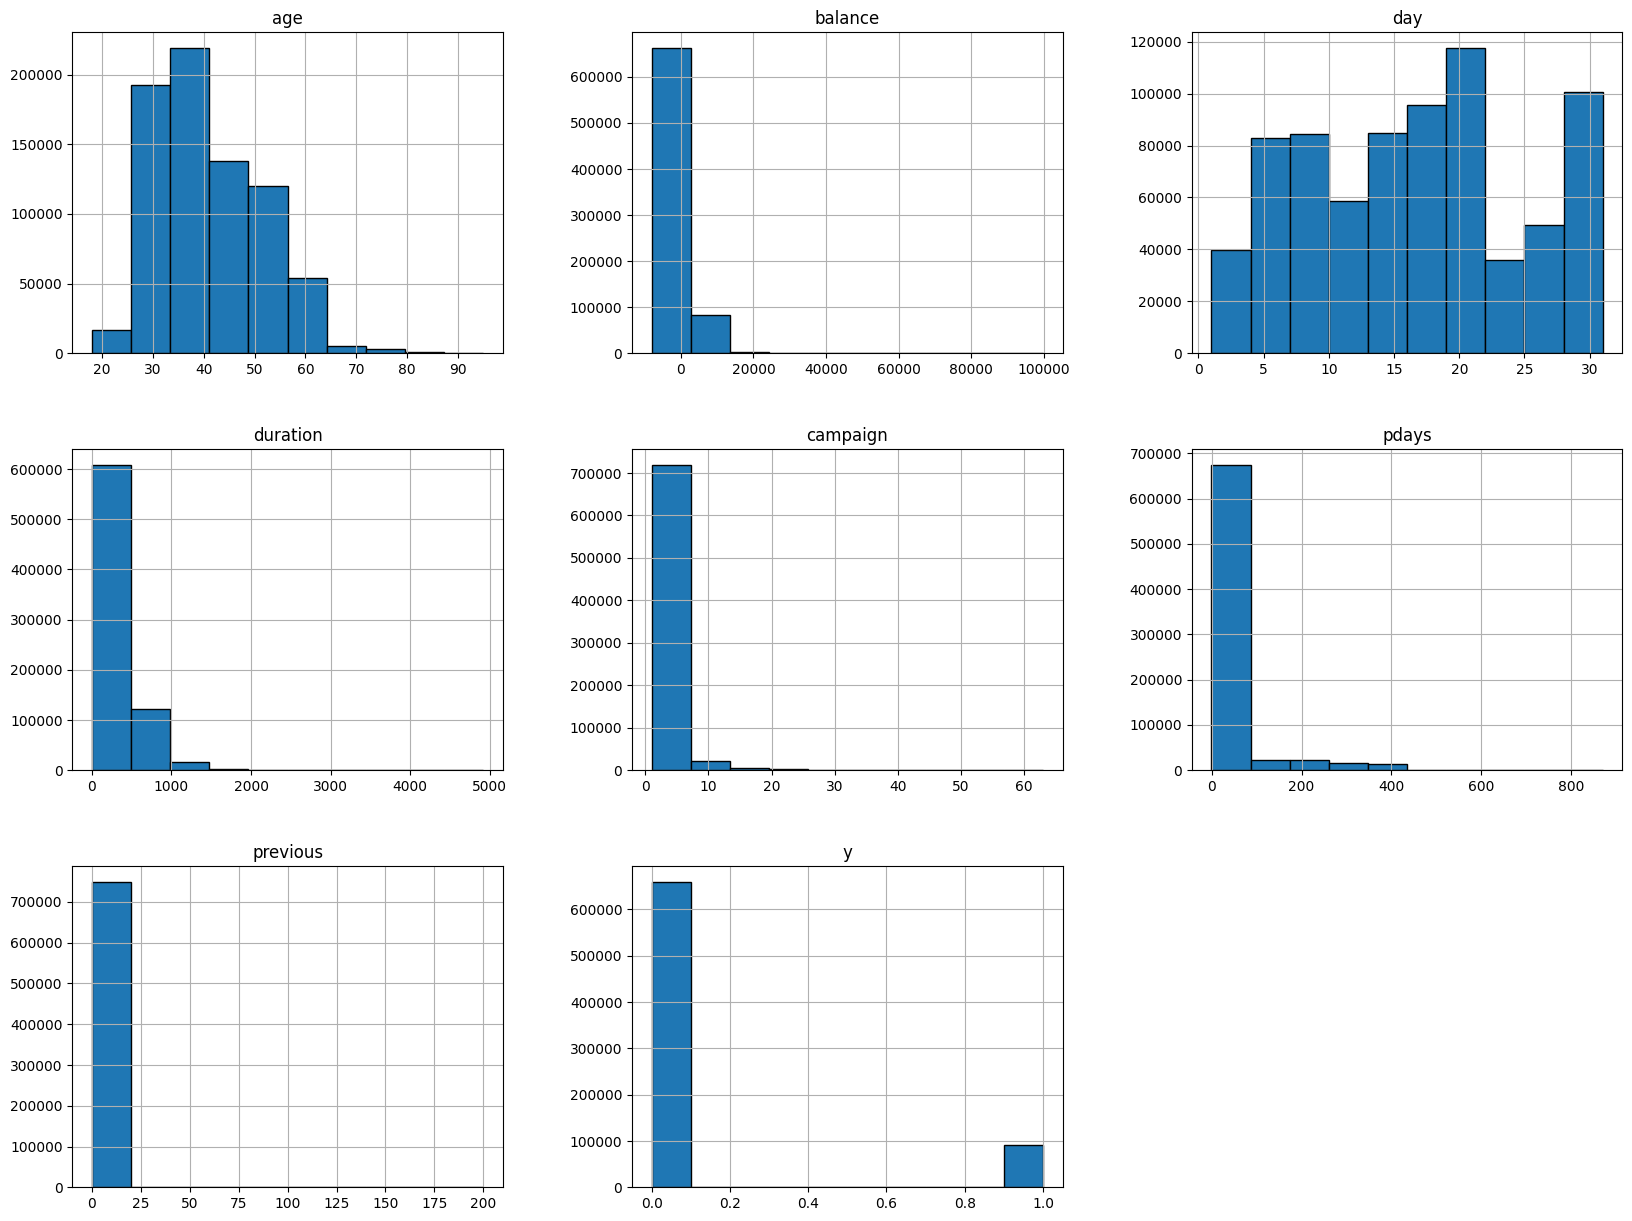

In [14]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [17]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [18]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [19]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [20]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [21]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
371471,1,2,2,1,1,1,1,6,4,-0.685816,-0.424372,0.835090,-0.499299,0.890173,-0.302922,-0.222868
268260,7,2,1,1,1,1,1,2,4,0.502971,0.724846,-0.376843,-0.484637,0.522649,-0.302922,-0.222868
542752,5,2,3,1,1,1,1,2,4,0.998299,-0.424372,-0.619229,-0.466309,0.155125,-0.302922,-0.222868
682074,10,2,4,1,1,1,1,6,4,1.493627,-0.424372,-0.982809,-0.455312,-0.212400,-0.302922,-0.222868
507077,8,2,1,1,1,1,1,6,4,1.790824,0.676932,1.804637,-0.627593,1.257697,-0.302922,-0.222868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507536,2,2,2,1,2,1,1,6,4,-0.784882,0.060751,0.713897,-0.528623,-0.579924,-0.302922,-0.222868
281496,2,2,2,1,1,1,1,2,4,0.899234,-0.424372,-0.982809,-0.726562,-0.212400,-0.302922,-0.222868
282772,2,2,2,1,2,1,3,9,4,0.007643,-0.676975,-0.255649,-0.213387,-0.579924,-0.302922,-0.222868


Below we define a function to help us do stratified kfold cross validation which we use below

In [22]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## Neural Networks

In [23]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.03981071710586548, valley=0.0030199517495930195)

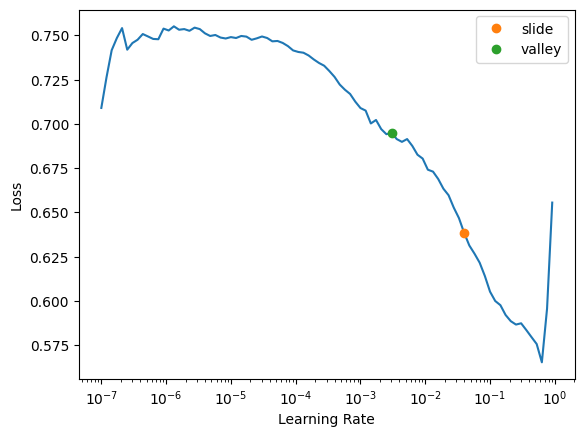

In [24]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [25]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.165087,0.164820,0.957882,01:28
1,0.167415,0.159602,0.960430,01:27


CPU times: user 2min 54s, sys: 1.23 s, total: 2min 55s
Wall time: 2min 56s


In [26]:
dl = test_dl

In [27]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [28]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [29]:
a_preds.shape

torch.Size([250000, 2])

In [30]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [31]:
nn_preds_x

tensor([[9.9918e-01, 8.1977e-04],
        [6.4803e-01, 3.5197e-01],
        [9.9789e-01, 2.1058e-03],
        ...,
        [9.9997e-01, 2.7450e-05],
        [9.9961e-01, 3.8965e-04],
        [9.9930e-01, 6.9834e-04]])

In [32]:
nn_preds_y

tensor([[9.9514e-01, 4.8595e-03],
        [7.7946e-01, 2.2054e-01],
        [9.9977e-01, 2.3475e-04],
        ...,
        [3.4856e-01, 6.5144e-01],
        [9.9859e-01, 1.4140e-03],
        [8.3448e-01, 1.6552e-01]])

In [33]:
a_preds

tensor([[9.9514e-01, 4.8595e-03],
        [7.7946e-01, 2.2054e-01],
        [9.9977e-01, 2.3475e-04],
        ...,
        [3.4856e-01, 6.5144e-01],
        [9.9859e-01, 1.4140e-03],
        [8.3448e-01, 1.6552e-01]])

In [34]:
nn_preds_proba

tensor([4.8595e-03, 2.2054e-01, 2.3475e-04,  ..., 6.5144e-01, 1.4140e-03,
        1.6552e-01])

In [35]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([4.8595e-03, 2.2054e-01, 2.3475e-04,  ..., 6.5144e-01, 1.4140e-03,
        1.6552e-01])

In [36]:
final_preds.shape

torch.Size([250000])

In [37]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.004859
750001,0.220541
750002,0.000235
750003,0.000063
750004,0.027181
...,...
999995,0.000074
999996,0.080289
999997,0.651445


## Decision Trees

### Random Forests

In [38]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 3s, sys: 244 ms, total: 2min 3s
Wall time: 2min 3s


0.9640280978996351

In [39]:
rf_preds_probs,rf_preds_probs.shape

(tensor([6.3326e-04, 1.8841e-01, 2.5000e-03,  ..., 5.9885e-01, 3.7433e-04,
         5.0939e-02]),
 torch.Size([250000]))

In [40]:
rf_preds_probs 

tensor([6.3326e-04, 1.8841e-01, 2.5000e-03,  ..., 5.9885e-01, 3.7433e-04,
        5.0939e-02])

In [41]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [42]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.463780
10,balance,0.098785
7,month,0.070104
9,age,0.065954
11,day,0.056917
8,poutcome,0.045227
14,pdays,0.037322
4,housing,0.037201
6,contact,0.028887
0,job,0.026436


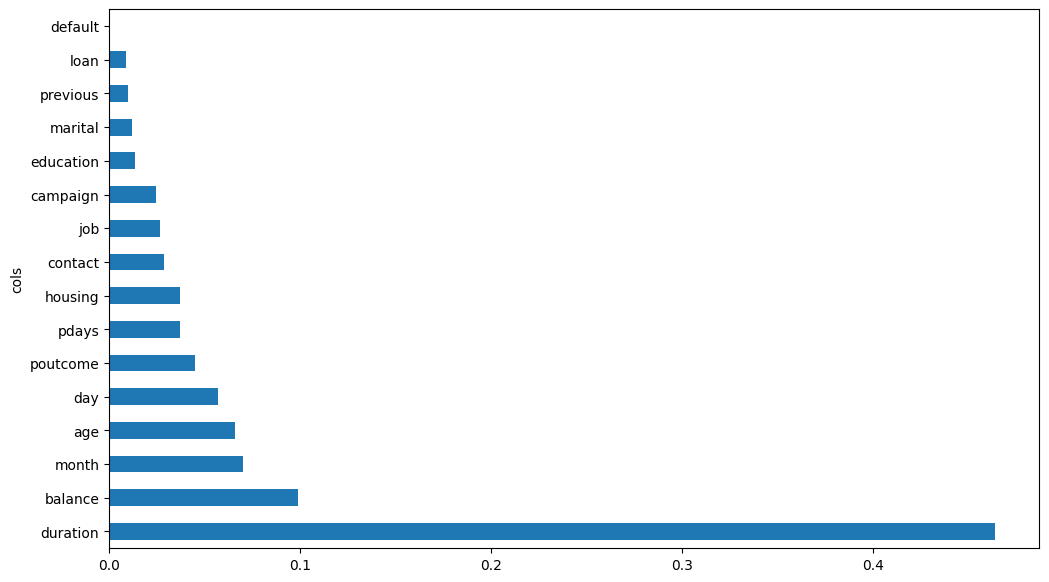

In [43]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [44]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [45]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.963207
Training fold 2/5...
Fold 2 roc_auc: 0.963762
Training fold 3/5...
Fold 3 roc_auc: 0.964007
Training fold 4/5...
Fold 4 roc_auc: 0.963516
Training fold 5/5...
Fold 5 roc_auc: 0.962905

Mean roc_auc: 0.963479


In [46]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [47]:
rf_oof_predictions

array([0.        , 0.0002127 , 0.00865584, ..., 0.        , 0.00177108, 0.        ])

In [48]:
rf_test_predictions

array([9.00245695e-04, 5.72966993e-01, 1.75186368e-04, ..., 1.50264460e-04, 2.46056809e-03, 2.09197245e-04])

In [49]:
rf_mean_score, rf_fold_scores

(0.9634793518750409,
 [0.9632072024766556,
  0.9637615833393773,
  0.9640067446357421,
  0.9635158144650713,
  0.9629054144583573])

In [50]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000633
750001,0.188408
750002,0.002500
750003,0.000008
750004,0.067312
...,...
999995,0.000000
999996,0.170285
999997,0.598853


## Gradient Boosting

### XGBoost

In [51]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 7.37 s, sys: 22 ms, total: 7.39 s
Wall time: 3.76 s


0.9660867233127848

In [52]:
xgb_preds_proba

tensor([1.9475e-03, 9.3408e-02, 2.8874e-04,  ..., 9.4848e-01, 2.7959e-04,
        3.2728e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

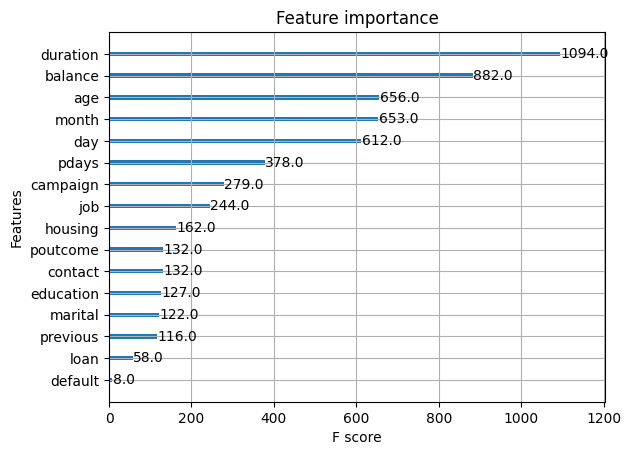

In [53]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [54]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.965659
Training fold 2/5...
Fold 2 roc_auc: 0.965883
Training fold 3/5...
Fold 3 roc_auc: 0.966215
Training fold 4/5...
Fold 4 roc_auc: 0.965875
Training fold 5/5...
Fold 5 roc_auc: 0.965333

Mean roc_auc: 0.965793


In [56]:
xgb_oof_predictions

array([0.00324636, 0.00185665, 0.00136572, ..., 0.00012758, 0.00509141, 0.00065287])

In [57]:
xgb_test_predictions

array([7.68006823e-04, 4.18759242e-01, 2.16815853e-03, ..., 1.88721613e-04, 3.54028951e-04, 3.47059067e-03])

In [58]:
xgb_mean_score

0.9657931248934025

In [59]:
 xgb_fold_scores

[0.9656591234803581,
 0.9658830797179615,
 0.9662152299559946,
 0.9658748103794372,
 0.9653333809332609]

In [60]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001947
750001,0.093408
750002,0.000289
750003,0.000260
750004,0.029079
...,...
999995,0.000167
999996,0.068758
999997,0.948484


### LGBM

In [61]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72460, number of negative: 527540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120767 -> initscore=-1.985190
[LightGBM] [Info] Start training from score -1.985190
CPU times: user 11.7 s, sys: 58.4 ms, total: 11.8 s
Wall time: 6.02 s


0.9654267513485978

In [62]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9953, 0.0047],
         [0.8802, 0.1198],
         [0.9984, 0.0016],
         ...,
         [0.2789, 0.7211],
         [0.9988, 0.0012],
         [0.9111, 0.0889]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

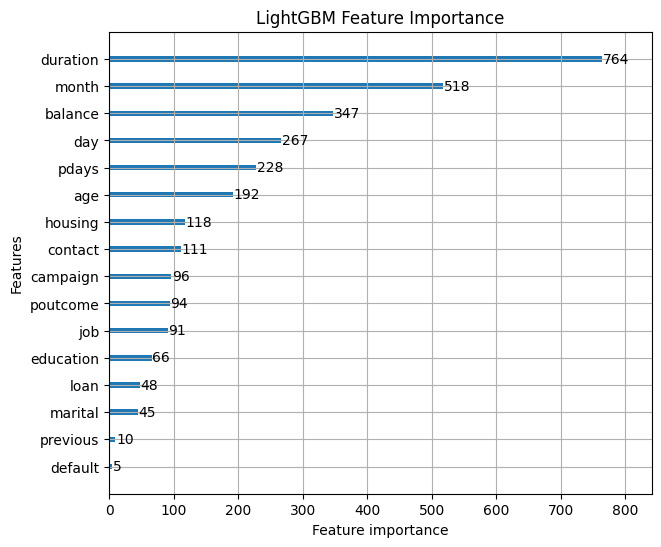

In [63]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [64]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [65]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57968, number of negative: 422032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120767 -> initscore=-1.985190
[LightGBM] [Info] Start training from score -1.985190
Fold 1 roc_auc: 0.964865
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57968, number of negative: 422032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points i

In [66]:
lgbm_oof_predictions

array([0.00486284, 0.00412531, 0.00245488, ..., 0.00067094, 0.00625116, 0.00211338])

In [67]:
lgbm_test_predictions

array([0.0010123 , 0.55907183, 0.00466605, ..., 0.00101684, 0.00078717, 0.00221807])

In [68]:
 lgbm_mean_score

0.9649959651069387

In [69]:
lgbm_fold_scores

[0.9648646721573261,
 0.9647693216613212,
 0.965579286169247,
 0.9652665839844432,
 0.9644999615623564]

In [70]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.004653
750001,0.119804
750002,0.001559
750003,0.000603
750004,0.032223
...,...
999995,0.000561
999996,0.096876
999997,0.721074


### CatBoost

In [71]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 3min 50s, sys: 9.86 s, total: 4min
Wall time: 1min 2s


0.9673954630135118

#### CatBoost Feature Importance

In [72]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   45.408447
7      month   10.679519
6    contact   10.101812
10   balance    7.542934
4    housing    6.385945
11       day    4.139345
9        age    2.721670
13  campaign    2.619602
14     pdays    2.583298
8   poutcome    2.101502


#### Cross validation - CatBoost

In [73]:
cat_model = CatBoostClassifier()
cat_model

In [74]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4814016	total: 50.1ms	remaining: 50s
1:	learn: 0.3624916	total: 97.8ms	remaining: 48.8s
2:	learn: 0.2975312	total: 145ms	remaining: 48.1s
3:	learn: 0.2604592	total: 192ms	remaining: 47.7s
4:	learn: 0.2389531	total: 238ms	remaining: 47.3s
5:	learn: 0.2239296	total: 282ms	remaining: 46.8s
6:	learn: 0.2144836	total: 336ms	remaining: 47.6s
7:	learn: 0.2080817	total: 381ms	remaining: 47.3s
8:	learn: 0.2033794	total: 429ms	remaining: 47.2s
9:	learn: 0.1997148	total: 516ms	remaining: 51.1s
10:	learn: 0.1969544	total: 582ms	remaining: 52.3s
11:	learn: 0.1936927	total: 635ms	remaining: 52.3s
12:	learn: 0.1907829	total: 684ms	remaining: 51.9s
13:	learn: 0.1891060	total: 731ms	remaining: 51.5s
14:	learn: 0.1874755	total: 779ms	remaining: 51.1s
15:	learn: 0.1859202	total: 826ms	remaining: 50.8s
16:	learn: 0.1849095	total: 871ms	remaining: 50.4s
17:	learn: 0.1837279	total: 920ms	remaining: 50.2s
18:	learn: 0.1827890	total: 965ms	remaini

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [75]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([2.2372e-03, 1.0865e-01, 2.2415e-04,  ..., 8.1762e-01, 5.5380e-04,
        2.3866e-01])

In [76]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([8.4674e-04, 4.6641e-01, 1.6867e-03,  ..., 2.6895e-04, 4.6602e-04,
        3.3817e-03])

In [77]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9674720985099668

#### CatBoost + LGBM

In [78]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([0.0036, 0.1218, 0.0009,  ..., 0.7039, 0.0010, 0.1195])

In [79]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [80]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9673434552138997

#### XGBoost + LGBM

In [81]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([3.3002e-03, 1.0661e-01, 9.2392e-04,  ..., 8.3478e-01, 7.3793e-04,
        2.0807e-01])

In [82]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.96658522506919

In [83]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003300
750001,0.106606
750002,0.000924
750003,0.000432
750004,0.030651
...,...
999995,0.000364
999996,0.082817
999997,0.834779


#### CatBoost + LGBM + XGBoost

In [84]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.0425e-03, 1.1237e-01, 6.6913e-04,  ..., 7.8544e-01, 7.6796e-04,
        1.8873e-01])

In [85]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9674166300805641

### Stacking

In [86]:
stacking_estimators = [
    ('cat_boost',cat_model),
    #('rf',rf_model),
    ('lgbm',lgbm_model),
    ('xgb',xgb_model),
]

#stacking_classifier_cat_xgb_lgbm= StackingClassifier(
    #estimators=stacking_estimators,
    #final_estimator=LogisticRegression(),
    #cv=5
#)
stacking_classifier_cat_lgbm= StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=lgb.LGBMClassifier(),
    cv=5
)
stacking_classifier_cat_lgbm.fit(X_train, y_train)


stacking_preds_cat_lgbm = (stacking_classifier_cat_lgbm.predict_proba(test_dl.xs))[:,1]
stacking_preds_cat_lgbm_x = (stacking_classifier_cat_lgbm.predict_proba(X_test))[:,1]

stacking_score_cat_lgbm = roc_auc_score(y_test, stacking_preds_cat_lgbm_x)

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

Learning rate set to 0.158199
0:	learn: 0.4683875	total: 66.5ms	remaining: 1m 6s
1:	learn: 0.3468785	total: 124ms	remaining: 1m 1s
2:	learn: 0.2846235	total: 184ms	remaining: 1m
3:	learn: 0.2519167	total: 240ms	remaining: 59.8s
4:	learn: 0.2311085	total: 298ms	remaining: 59.3s
5:	learn: 0.2182772	total: 354ms	remaining: 58.7s
6:	learn: 0.2103046	total: 413ms	remaining: 58.6s
7:	learn: 0.2036686	total: 469ms	remaining: 58.2s
8:	learn: 0.1985514	total: 526ms	remaining: 57.9s
9:	learn: 0.1954010	total: 583ms	remaining: 57.7s
10:	learn: 0.1924752	total: 641ms	remaining: 57.6s
11:	learn: 0.1904251	total: 696ms	remaining: 57.3s
12:	learn: 0.1887703	total: 755ms	remaining: 57.3s
13:	learn: 0.1872733	total: 815ms	remaining: 57.4s
14:	learn: 0.1857194	total: 875ms	remaining: 57.5s
15:	learn: 0.1840726	total: 930ms	remaining: 57.2s
16:	learn: 0.1829902	total: 987ms	remaining: 57.1s
17:	learn: 0.1820009	total: 1.04s	remaining: 56.7s
18:	learn: 0.1810045	total: 1.09s	remaining: 56.5s
19:	learn: 0.

In [87]:
stacking_preds_cat_lgbm.shape

(250000,)

In [88]:
stacking_preds_cat_lgbm = torch.tensor(stacking_preds_cat_lgbm)

In [89]:
stacking_preds_cat_lgbm

tensor([9.4628e-04, 9.6658e-02, 2.3799e-05,  ..., 6.9417e-01, 9.1440e-06,
        2.3063e-01], dtype=torch.float64)

In [90]:
!rm submission.csv
sub_df['y'] = stacking_preds_cat_lgbm 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000946
750001,0.096658
750002,0.000024
750003,0.000037
750004,0.028996
...,...
999995,0.000028
999996,0.089769
999997,0.694169


## AutoML

### AutoGluon

In [91]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
#Time_limit = 3600*10
Time_limit = 300
problem_type='binary'

In [92]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 2}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250811_074638"
2025-08-11 07:46:39,115	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-11 07:46:41,963	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=726) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning generated.
(_ray_fit pid=726) 1 warning gener

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3   0.962625     roc_auc      23.554127  203.626384                0.124825          14.136408            3       True          6
1    WeightedEnsemble_L2   0.962488     roc_auc      17.125232  141.050365                0.124866          10.620516            2       True          4
2      LightGBMXT_BAG_L1   0.961803     roc_auc      12.145087  129.289700               12.145087         129.289700            1       True          3
3      LightGBMXT_BAG_L2   0.961567     roc_auc      23.429301  189.489975                1.836484          57.818812            2       True          5
4  KNeighborsDist_BAG_L1   0.876041     roc_auc       4.855278    1.140150                4.855278           1.140150            1       True          2
5  KNeighborsUnif_BA

In [93]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


In [94]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3   0.962625     roc_auc      23.554127  203.626384                0.124825          14.136408            3       True          6
1    WeightedEnsemble_L2   0.962488     roc_auc      17.125232  141.050365                0.124866          10.620516            2       True          4
2      LightGBMXT_BAG_L1   0.961803     roc_auc      12.145087  129.289700               12.145087         129.289700            1       True          3
3      LightGBMXT_BAG_L2   0.961567     roc_auc      23.429301  189.489975                1.836484          57.818812            2       True          5
4  KNeighborsDist_BAG_L1   0.876041     roc_auc       4.855278    1.140150                4.855278           1.140150            1       True          2
5  KNeighborsUnif_BA

In [95]:
%%time
predictor.leaderboard()

CPU times: user 1.86 ms, sys: 2.96 ms, total: 4.82 ms
Wall time: 4.4 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.962625,roc_auc,23.554127,203.626384,0.124825,14.136408,3,True,6
1,WeightedEnsemble_L2,0.962488,roc_auc,17.125232,141.050365,0.124866,10.620516,2,True,4
2,LightGBMXT_BAG_L1,0.961803,roc_auc,12.145087,129.289700,12.145087,129.289700,1,True,3
3,LightGBMXT_BAG_L2,0.961567,roc_auc,23.429301,189.489975,1.836484,57.818812,2,True,5
4,KNeighborsDist_BAG_L1,0.876041,roc_auc,4.855278,1.140150,4.855278,1.140150,1,True,2
5,KNeighborsUnif_BAG_L1,0.875218,roc_auc,4.592452,1.241314,4.592452,1.241314,1,True,1


In [96]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

CPU times: user 45.4 s, sys: 67.3 ms, total: 45.5 s
Wall time: 22 s


,0,1
id,,
750000,0.985841,0.014159
750001,0.827511,0.172489
750002,0.993345,0.006655
750003,0.993718,0.006282
750004,0.976877,0.023123


In [97]:
predictions = autogluon_preds_proba

In [98]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

CPU times: user 45.3 s, sys: 98.6 ms, total: 45.3 s
Wall time: 21.9 s


id
750000    0.014159
750001    0.172489
750002    0.006655
750003    0.006282
750004    0.023123
Name: y, dtype: float32

In [99]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [100]:
autogluon_preds_proba.values

array([0.01415892, 0.17248937, 0.00665451, ..., 0.82442343, 0.00785467, 0.11752415], dtype=float32)

In [101]:
#!rm submission.csv
#sub_df['y'] = autogluon_preds_proba.values
#sub_df.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

In [102]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [103]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [104]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.967472
7,CatBoost_XGB_LGBM_average,0.967417
3,CatBoost,0.967395
5,CatBoost_LGBM_average,0.967343
6,XGB_LGBM_average,0.966585
1,XGBoost,0.966087
2,LGBM,0.965427
0,Random Forest,0.964028
